In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv('bootcamp_student_data_filled.csv')

# Fill missing values
df = df.fillna(0)

# Define target and features
y = df['Bootcamp_Interest']
X = df.drop(['Name', 'Bootcamp_Interest', 'DOB', 'Time_to_Graduate'], axis=1)

In [41]:
# Filter rows where 'Bootcamp_Interest' is 1
interest_df = df[df['Bootcamp_Interest'] == 1]

# Print the index, name, and Bootcamp_Interest
print(interest_df[['Name', 'Bootcamp_Interest']])


                     Name  Bootcamp_Interest
0        Ogechukwu, Tasie                1.0
1            Ragland, Joy                1.0
3           Treski, Karin                1.0
4              Byrd, Reah                1.0
6   Onyebinachi, Kingsley                1.0
8         Martin, Djuvane                1.0
13            Rich, Kiana                1.0


In [42]:
# Feature Scaling
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X[['Years_of_Work_Experience', 'LinkedIn_Connections']] = minmax_scaler.fit_transform(
    X[['Years_of_Work_Experience', 'LinkedIn_Connections']]
)
X[['Certifications']] = standard_scaler.fit_transform(X[['Certifications']])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df['Standardized_Technical_Skills'] = df['Relevant_Technical_Skills'].apply(lambda x: 1 if x >= 5 else 0)
df.drop('Relevant_Technical_Skills', axis=1, inplace=True)


In [43]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Epoch 1/50


c:\Users\me\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

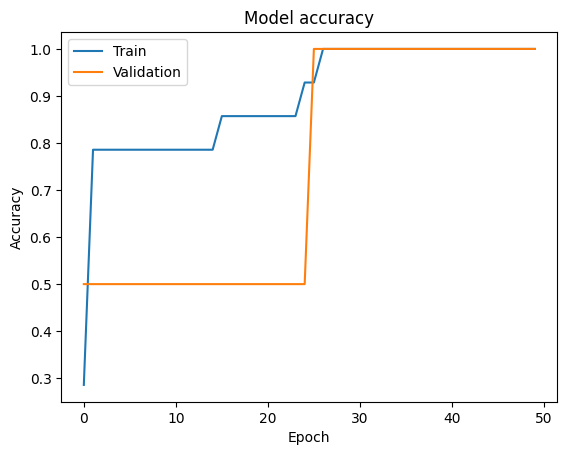

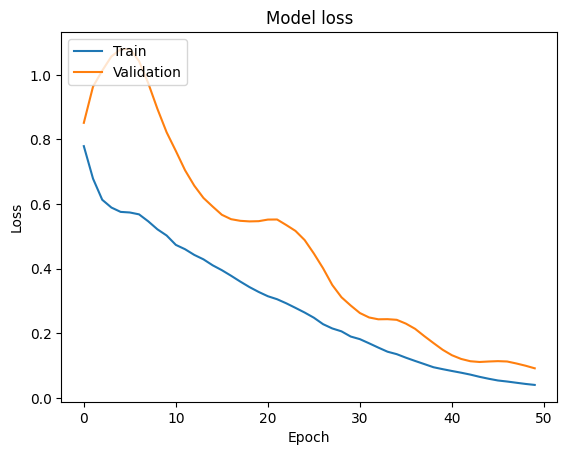

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Add predictions to DataFrame
df['Predicted_Graduates'] = 0
df.loc[X_test.index, 'Predicted_Graduates'] = y_pred

# Filter rows where 'Predicted_Graduates' is 1
filtered_df = df[df['Predicted_Graduates'] == 1][['Name', 'Predicted_Graduates']]
print(filtered_df.reset_index(drop=True))



              Name  Predicted_Graduates
0  Martin, Djuvane                    1


In [ ]:
# Save the updated DataFrame
df.to_csv('bootcamp_grad_nn_mod_predictions.csv', index=False)


# Do you see that?


The nn model did not work out so well under its current circumstances. 